In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Avoid warnings
import warnings
warnings.simplefilter(action='ignore')


In [18]:
df = pd.read_csv("/kaggle/input/datasets/brendan45774/test-file/tested.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
df['Age'] = df['Age'].fillna(df['Age'].mean())



In [12]:
df.drop(columns=['Cabin'], inplace=True)


In [21]:
df = df.drop(columns=['Cabin'])


In [20]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [22]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [23]:
df['FamilySize'] = df['SibSp'] + df['Parch']


In [24]:
age_survival = df.groupby('AgeGroup', observed=False)['Survived'].mean()
print("\nSurvival Rate by Age Group:")
print(age_survival)



Survival Rate by Age Group:
AgeGroup
Child          0.480000
Teen           0.413793
Young Adult    0.335907
Adult          0.393617
Senior         0.363636
Name: Survived, dtype: float64


In [ ]:
embark_survival = df.groupby('Embarked', observed=False)['Survived'].mean()
print("\nSurvival Rate by Embarkation Port:")
print(embark_survival)


In [5]:
family_survival = df.groupby('FamilySize')['Survived'].mean()
print("\nSurvival Rate by Family Size:")
print(family_survival)



Survival Rate by Family Size:
FamilySize
0     0.268775
1     0.486486
2     0.526316
3     0.714286
4     0.285714
5     0.666667
6     0.250000
7     0.500000
10    0.500000
Name: Survived, dtype: float64


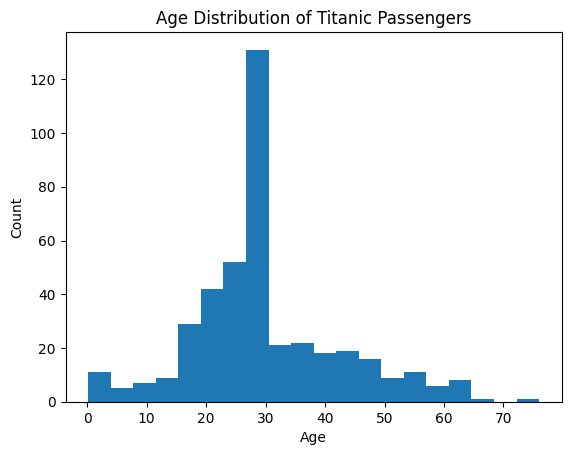

In [4]:
plt.figure()
plt.hist(df['Age'], bins=20)
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


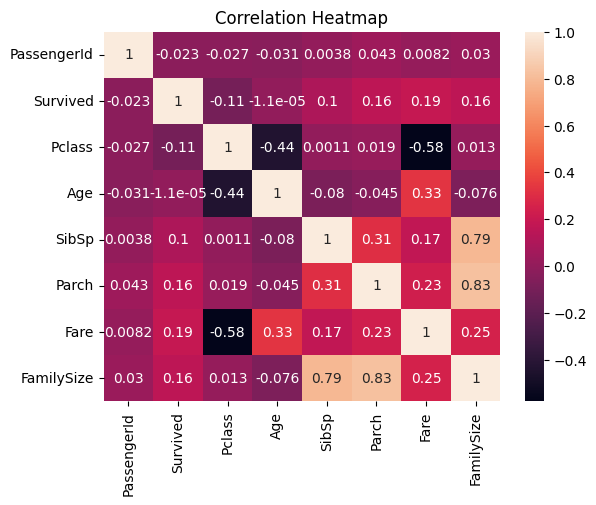

In [3]:
plt.figure()
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap")
plt.show()


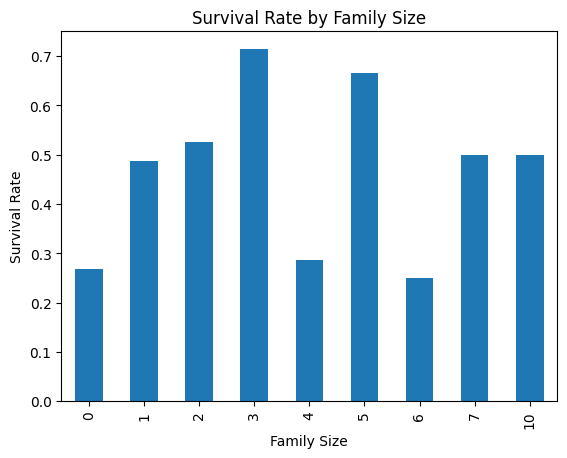

In [2]:
plt.figure()
family_survival.plot(kind='bar')
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()


Survival by Age Group:
 AgeGroup
Child          0.480000
Teen           0.413793
Young Adult    0.335907
Adult          0.393617
Senior         0.363636
Name: Survived, dtype: float64

Survival by Embarked:
 Embarked
C    0.392157
Q    0.521739
S    0.325926
Name: Survived, dtype: float64

Survival by Family Size:
 FamilySize
0     0.268775
1     0.486486
2     0.526316
3     0.714286
4     0.285714
5     0.666667
6     0.250000
7     0.500000
10    0.500000
Name: Survived, dtype: float64


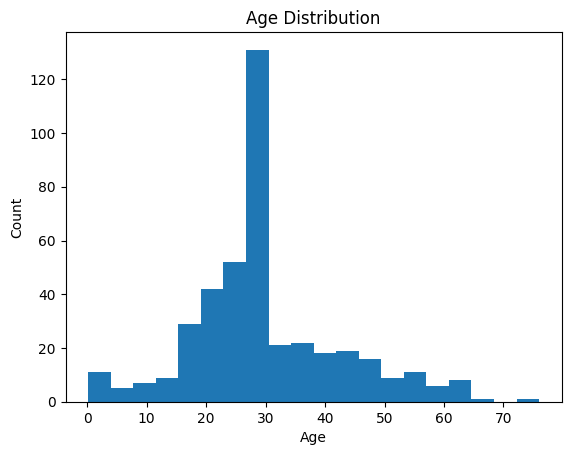

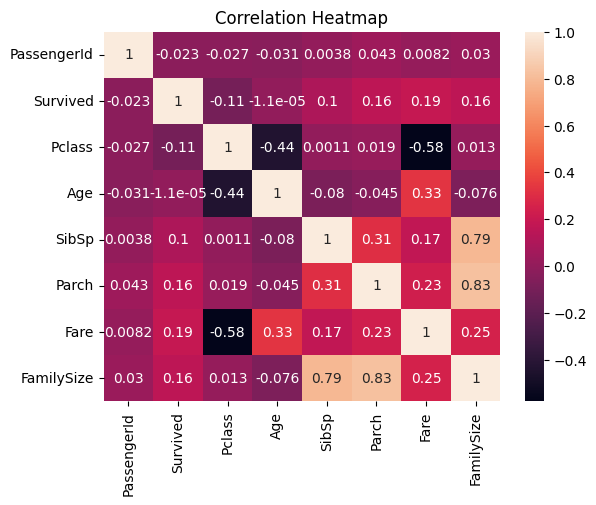

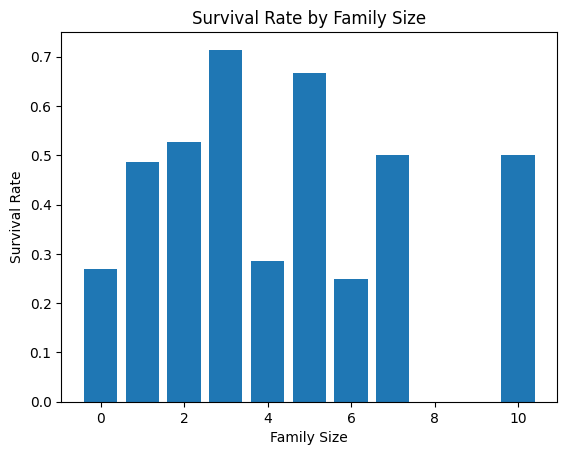

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("/kaggle/input/datasets/brendan45774/test-file/tested.csv")

# ----------------------------
# 1. Data Cleaning
# ----------------------------

# Fill missing Age with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing Embarked with mode (important)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

# ----------------------------
# 2. Feature Engineering
# ----------------------------

# Create Age Groups
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Create Family Size
df['FamilySize'] = df['SibSp'] + df['Parch']

# ----------------------------
# 3. Groupby Analysis
# ----------------------------

age_survival = df.groupby('AgeGroup')['Survived'].mean()
embark_survival = df.groupby('Embarked')['Survived'].mean()
family_survival = df.groupby('FamilySize')['Survived'].mean()

print("Survival by Age Group:\n", age_survival)
print("\nSurvival by Embarked:\n", embark_survival)
print("\nSurvival by Family Size:\n", family_survival)

# ----------------------------
# 4. Visualizations
# ----------------------------

# Age Distribution
plt.figure()
plt.hist(df['Age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Correlation Heatmap
plt.figure()
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Survival by Family Size (BAR PLOT FIXED)
plt.figure()
plt.bar(family_survival.index, family_survival.values)
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()
